In [3]:
import os
os.environ['CUDA_VISIBLE_DEVICES'] = '2'

from PIL import Image
import requests

In [ ]:
from transformers import PaliGemmaForConditionalGeneration, PaliGemmaProcessor

model = PaliGemmaForConditionalGeneration.from_pretrained("paligemma_vqav2_custom/iter_2010/", 
                                                          device_map="auto",
                                                          cache_dir="./hf_models/")
model.eval()

processor = PaliGemmaProcessor.from_pretrained("google/paligemma2-3b-pt-224", cache_dir="./hf_models/")

Fetching 2 files:   0%|          | 0/2 [00:00<?, ?it/s]

Loading checkpoint shards:   0%|          | 0/2 [00:00<?, ?it/s]

Using a slow image processor as `use_fast` is unset and a slow processor was saved with this model. `use_fast=True` will be the default behavior in v4.50, even if the model was saved with a slow processor. This will result in minor differences in outputs. You'll still be able to use a slow processor with `use_fast=False`.


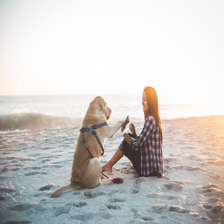

In [4]:
image_file = "https://qianwen-res.oss-cn-beijing.aliyuncs.com/Qwen-VL/assets/demo.jpeg"
raw_image = Image.open(requests.get(image_file, stream=True).raw).resize((224,224))
raw_image

In [10]:
prompt = "<image> What is the dog doing?"
inputs = processor(prompt, raw_image.convert("RGB"), return_tensors="pt").to("cuda")
output = model.generate(**inputs, max_new_tokens=128)
print(processor.decode(output[0], skip_special_tokens=True))

 What is the dog doing?
laying down


In [11]:
prompt = "<image> Where is this place?"
inputs = processor(prompt, raw_image.convert("RGB"), return_tensors="pt").to("cuda")
output = model.generate(**inputs, max_new_tokens=128)
print(processor.decode(output[0], skip_special_tokens=True))

 Where is this place?
beach
